In [ ]:
#@title Default Sample Space
horizontal_board = [['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'],
                    ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10'],
                    ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10'],
                    ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'],
                    ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10'],
                    ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10'],
                    ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10'],
                    ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10'],
                    ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10'],
                    ['J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']]

vertical_board = [['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1'],
                  ['A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'G2', 'H2', 'I2', 'J2'],
                  ['A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'G3', 'H3', 'I3', 'J3'],
                  ['A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'G4', 'H4', 'I4', 'J4'],
                  ['A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'G5', 'H5', 'I5', 'J5'],
                  ['A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'G6', 'H6', 'I6', 'J6'],
                  ['A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'G7', 'H7', 'I7', 'J7'],
                  ['A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'G8', 'H8', 'I8', 'J8'],
                  ['A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'G9', 'H9', 'I9', 'J9'],
                  ['A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'G10', 'H10', 'I10', 'J10']]

heat_map = [['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#'],
            ['#', '#', '#', '#', '#', '#', '#', '#', '#']]


letter_table = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4,
                "F": 5, "G": 6, "H": 7, "I": 8, "J": 9}

ship_lengths = {"Aircraft Carrier": 5, "Battleship": 4, "Cruiser": 3,
                 "Submarine": 3, "Patrol_boat": 2}


In [ ]:
#@title Define Important Classes and Functions
import math
import random

class ship_class:
  def __init__(self, battleship_name, battleship_length):
    self.battleship_name = battleship_name
    self.battleship_length = battleship_length
    self.ship_arrangements = []
    self.total_combinations = 0
    self.current_bits = 0
    self.entropy_term = 0
    self.hit_search_space = []
    self.is_sunk = False
    self.my_probability = 0

  def total_options(self):
      #find total arrangements horizontally
      for row in horizontal_board:
        window_start = 0
        window_end = self.battleship_length
        for options in range(11-self.battleship_length):
          space = row[window_start:window_end]
          window_start += 1
          window_end += 1
          self.ship_arrangements.append(space)

      #find total arrangements vertically
      for row in vertical_board:
        window_start = 0
        window_end = self.battleship_length
        for options in range(11-self.battleship_length):
          space = row[window_start:window_end]
          window_start += 1
          window_end += 1
          self.ship_arrangements.append(space)

      self.total_combinations += len(self.ship_arrangements)

  def is_hit(self, hit_space):
    # if ship is hit, narrow down search space to only arrangements
    # that contain the space that registered a hit
    global total_ship_arrangements
    ship_positions = all_ship_arrangements.get(self.battleship_name)
    targets = []
    for positions in ship_positions:
      if hit_space in positions:
        targets.append(positions)

    # clear search space and populate with the only available arrangements
    del all_ship_arrangements[self.battleship_name]
    all_ship_arrangements[self.battleship_name] = targets
    adjustment_factor = len(targets)

    # return an adjustment factor to change total_arrangements to amount of targets
    return adjustment_factor


  def sunk(self):
    self.is_sunk = True
    del all_ship_arrangements[self.battleship_name]

  def remove_from_search_space(self, player_move):
    global total_ship_arrangements
    ship_positions = all_ship_arrangements.get(self.battleship_name)
    for i in range(3):
      for positions in ship_positions:
        if player_move in positions:
          ship_positions.remove(positions)
          total_ship_arrangements -= 1



def search_mode():
  weighted_spaces = {}

  for space in board:
    entropy = 0
    total_prob = 0

    if space != "##" or space != "###":
      for battleship_name in all_ship_arrangements:

        battleship_arrangements = all_ship_arrangements.get(battleship_name)
        #Find how many ship arrangements are in the space
        num_ships_in_space = 0

        for each_arrangement in battleship_arrangements:
          if space in each_arrangement:
            num_ships_in_space += 1

        #Calculate the entropy of each space. E[X] where X is the chance of success and failure
        #Because X changes consistently due to the different spaces, a binomial experiment
        #is not applicable

        if num_ships_in_space > 0:
          #Calculate the info gained if the space leads to a hit
          hit_prob = num_ships_in_space / total_ship_arrangements
          hit_info = math.log(1/hit_prob, 2)
          entropy += hit_info * hit_prob


          #Calculate the info gained if the space leads is a miss
          miss_prob = 1 - hit_prob
          if miss_prob > 0:
            miss_info = math.log(1/miss_prob, 2)
            entropy += miss_info * miss_prob

          total_prob += hit_prob + miss_prob


          #save expected information of space in dictionary
          weighted_spaces[space] = entropy


  #find best space
  Best_space = max(weighted_spaces, key=weighted_spaces.get)
  Highest_info = weighted_spaces[Best_space]

  #search if there are other equally favorable spaces
  top_moves = [k for k, v in weighted_spaces.items() if v == Highest_info]
  one_of_top_moves = len(top_moves) - 1

  #randomnly select one of these top spaces
  Best_space = top_moves[random.randint(0,one_of_top_moves)]

  suggested_move = {Best_space:weighted_spaces[Best_space]}

  return suggested_move, weighted_spaces



Occurences: [0, 0, 29, 80, 109, 68, 71, 51, 53, 40, 51, 61, 65, 49, 34, 35, 39, 65, 55, 14, 11, 19, 1, 0, 0, 0, 0, 0, 0, 0] 
ENTROPY: 4.167317657262427
MEAN: 10.866 
STANDARD DEVIATION: 5.312651717200015


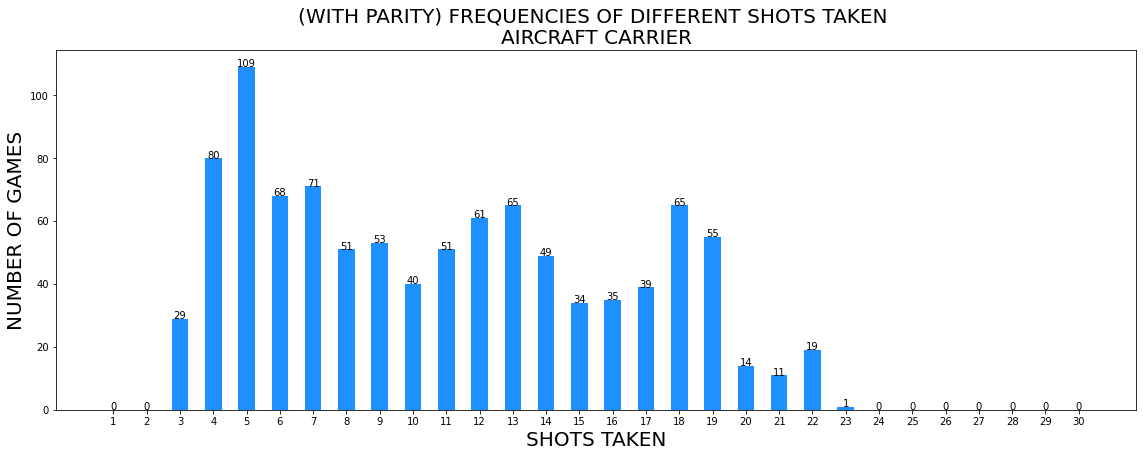

In [ ]:
#@title Aircraft Carrier Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0
data_points = []

for shot in range(1, 31):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  is_2_ships = False

  board= ['##', 'A2', '##', 'A4', '##', 'A6', '##', 'A8', '##', 'A10',
          'B1', '##', 'B3', '##', 'B5', '##', 'B7', '##', 'B9', '###',
          '##', 'C2', '##', 'C4', '##', 'C6', '##', 'C8', '##', 'C10',
          'D1', '##', 'D3', '##', 'D5', '##', 'D7', '##', 'D9', '###',
          '##', 'E2', '##', 'E4', '##', 'E6', '##', 'E8', '##', 'E10',
          'F1', '##', 'F3', '##', 'F5', '##', 'F7', '##', 'F9', '###',
          '##', 'G2', '##', 'G4', '##', 'G6', '##', 'G8', '##', 'G10',
          'H1', '##', 'H3', '##', 'H5', '##', 'H7', '##', 'H9', '###',
          '##', 'I2', '##', 'I4', '##', 'I6', '##', 'I8', '##', 'I10',
          'J1', '##', 'J3', '##', 'J5', '##', 'J7', '##', 'J9', '###']


  all_ship_arrangements = {}


  Aircraft_carrier = ship_class("Aircraft_carrier", 5)
  Aircraft_carrier.total_options()
  all_ship_arrangements["Aircraft_carrier"] = Aircraft_carrier.ship_arrangements
  total_ship_arrangements = 120
  trial_target = Aircraft_carrier.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

#  print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  ship_name = next(iter(all_ship_arrangements))

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Aircraft_carrier.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        if len(all_ship_arrangements.get(ship_name)) == 2:
          is_2_ships = True

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_2_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Aircraft_carrier.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1


        if len(all_ship_arrangements.get(ship_name)) == 2:
          is_2_ships = True

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_2_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  data_points.append(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence


list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())
print(f"Occurences: {number_of_occurrences} ")

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)

data_mean = statistics.mean(data_points)
data_standard_deviation = statistics.stdev(data_points)

print(f"ENTROPY: {H}")
print(f"MEAN: {data_mean} \nSTANDARD DEVIATION: {data_standard_deviation}")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('NUMBER OF GAMES', fontsize=20)
plt.title(f'(WITH PARITY) FREQUENCIES OF DIFFERENT SHOTS TAKEN \nAIRCRAFT CARRIER', fontsize=20)
plt.show()

Occurences: [0, 16, 25, 66, 66, 60, 60, 43, 51, 49, 58, 43, 36, 46, 36, 33, 32, 37, 41, 41, 59, 25, 26, 32, 19, 0, 0, 0, 0, 0] 
ENTROPY: 4.497217948253344
MEAN: 12.547 
STANDARD DEVIATION: 6.4782527550844105


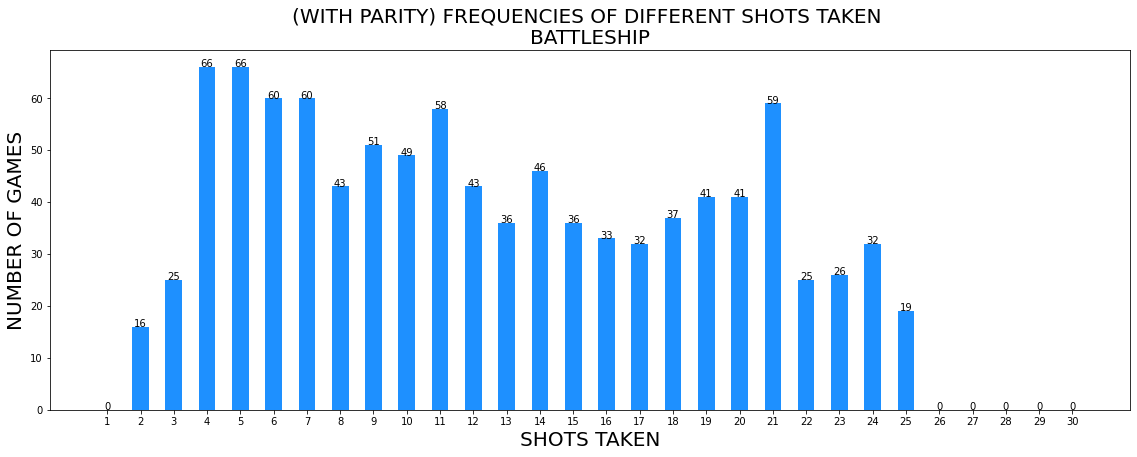

In [ ]:
#@title Battleship Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0
data_points = []

for shot in range(1, 31):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  is_2_ships = False

  board= ['##', 'A2', '##', 'A4', '##', 'A6', '##', 'A8', '##', 'A10',
          'B1', '##', 'B3', '##', 'B5', '##', 'B7', '##', 'B9', '###',
          '##', 'C2', '##', 'C4', '##', 'C6', '##', 'C8', '##', 'C10',
          'D1', '##', 'D3', '##', 'D5', '##', 'D7', '##', 'D9', '###',
          '##', 'E2', '##', 'E4', '##', 'E6', '##', 'E8', '##', 'E10',
          'F1', '##', 'F3', '##', 'F5', '##', 'F7', '##', 'F9', '###',
          '##', 'G2', '##', 'G4', '##', 'G6', '##', 'G8', '##', 'G10',
          'H1', '##', 'H3', '##', 'H5', '##', 'H7', '##', 'H9', '###',
          '##', 'I2', '##', 'I4', '##', 'I6', '##', 'I8', '##', 'I10',
          'J1', '##', 'J3', '##', 'J5', '##', 'J7', '##', 'J9', '###']


  all_ship_arrangements = {}


  Battleship = ship_class("Battleship", 4)
  Battleship.total_options()
  all_ship_arrangements["Battleship"] = Battleship.ship_arrangements
  total_ship_arrangements = 140
  trial_target = Battleship.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

#  print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  ship_name = next(iter(all_ship_arrangements))

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Battleship.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        if len(all_ship_arrangements.get(ship_name)) == 2:
          is_2_ships = True

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_2_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Battleship.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1


        if len(all_ship_arrangements.get(ship_name)) == 2:
          is_2_ships = True

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_2_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  data_points.append(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence


list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())
print(f"Occurences: {number_of_occurrences} ")

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)

data_mean = statistics.mean(data_points)
data_standard_deviation = statistics.stdev(data_points)

print(f"ENTROPY: {H}")
print(f"MEAN: {data_mean} \nSTANDARD DEVIATION: {data_standard_deviation}")


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('NUMBER OF GAMES', fontsize=20)
plt.title(f'(WITH PARITY) FREQUENCIES OF DIFFERENT SHOTS TAKEN \nBATTLESHIP', fontsize=20)
plt.show()

# The Following are Broken. Still need to be fixed

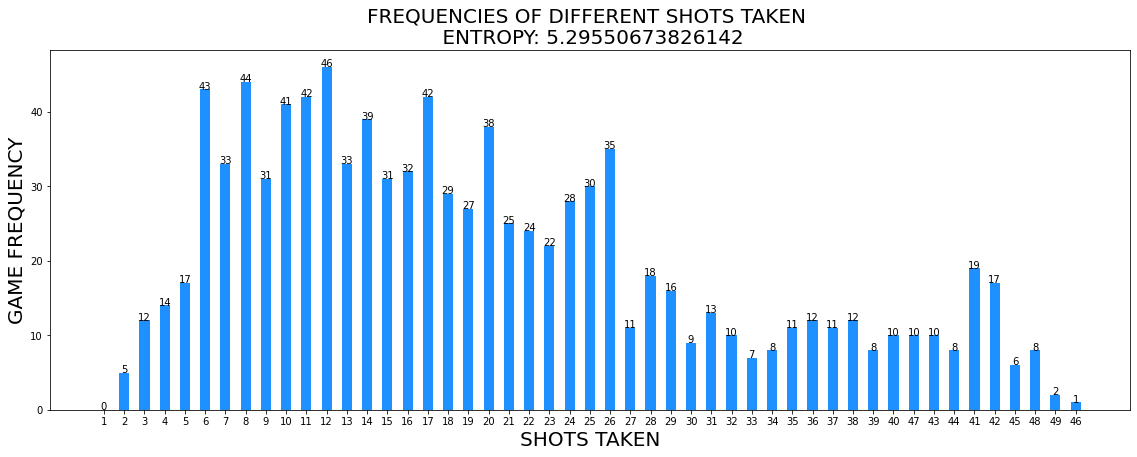

In [ ]:
#@title Cruiser/Submarine Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0

for shot in range(1, 41):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  is_3_ships = False

  board =  ['##', 'A2', '##', 'A4', '##', 'A6', '##', 'A8', '##', 'A10',
            'B1', '##', 'B3', '##', 'B5', '##', 'B7', '##', 'B9', '###',
            '##', 'C2', '##', 'C4', '##', 'C6', '##', 'C8', '##', 'C10',
            'D1', '##', 'D3', '##', 'D5', '##', 'D7', '##', 'D9', '###',
            '##', 'E2', '##', 'E4', '##', 'E6', '##', 'E8', '##', 'E10',
            'F1', '##', 'F3', '##', 'F5', '##', 'F7', '##', 'F9', '###',
            '##', 'G2', '##', 'G4', '##', 'G6', '##', 'G8', '##', 'G10',
            'H1', '##', 'H3', '##', 'H5', '##', 'H7', '##', 'H9', '###',
            '##', 'I2', '##', 'I4', '##', 'I6', '##', 'I8', '##', 'I10',
            'J1', '##', 'J3', '##', 'J5', '##', 'J7', '##', 'J9', '###']

  heat_map = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
            'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10',
            'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
            'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
            'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
            'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
            'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10',
            'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10',
            'J1', 'J2', 'J3', 'J4', 'J5', 'J6', 'J7', 'J8', 'J9', 'J10']


  all_ship_arrangements = {}


  Cruiser = ship_class("Cruiser", 3)
  Cruiser.total_options()
  all_ship_arrangements["Cruiser"] = Cruiser.ship_arrangements
  total_ship_arrangements = 160
  trial_target = Cruiser.ship_arrangements[random.randint(0,total_ship_arrangements-1)]


  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  ship_name = next(iter(all_ship_arrangements))

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Cruiser.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        if len(all_ship_arrangements.get(ship_name)) == 3:
          is_3_ships = True
          shots_taken += 2

        elif len(all_ship_arrangements.get(ship_name)) == 2:
          is_3_ships = True
          shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_3_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Cruiser.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1


        if len(all_ship_arrangements.get(ship_name)) == 3:
          is_3_ships = True
          shots_taken += 2

        elif len(all_ship_arrangements.get(ship_name)) == 2:
          is_3_ships = True
          shots_taken += 1

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_3_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence



# sorted_shots_distribution = {}

# for key, value in sorted(shots_distribution.items(), key=lambda kv: kv[1], reverse=True):
#     sorted_shots_distribution[key] = shots_distribution[key]

# print(f"Shot distributions: {sorted_shots_distribution} ")

list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('GAME FREQUENCY', fontsize=20)
plt.title(f'FREQUENCIES OF DIFFERENT SHOTS TAKEN \n ENTROPY: {H}', fontsize=20)
plt.show()

In [ ]:
#@title Patrol Boat Shot Lengths Distributions
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy

number_of_trials = 1000
shots_distribution = {}
trial_num = 0

for shot in range(1, 41):
  #data_entry = "Shots taken: " + str(shot)
  data_entry = str(shot)
  shots_distribution[data_entry] = 0

for trial in range(number_of_trials):

  is_2_ships = False

  board = ['##', 'A2', '##', 'A4', '##', 'A6', '##', 'A8', '##', 'A10',
            'B1', '##', 'B3', '##', 'B5', '##', 'B7', '##', 'B9', '###',
            '##', 'C2', '##', 'C4', '##', 'C6', '##', 'C8', '##', 'C10',
            'D1', '##', 'D3', '##', 'D5', '##', 'D7', '##', 'D9', '###',
            '##', 'E2', '##', 'E4', '##', 'E6', '##', 'E8', '##', 'E10',
            'F1', '##', 'F3', '##', 'F5', '##', 'F7', '##', 'F9', '###',
            '##', 'G2', '##', 'G4', '##', 'G6', '##', 'G8', '##', 'G10',
            'H1', '##', 'H3', '##', 'H5', '##', 'H7', '##', 'H9', '###',
            '##', 'I2', '##', 'I4', '##', 'I6', '##', 'I8', '##', 'I10',
            'J1', '##', 'J3', '##', 'J5', '##', 'J7', '##', 'J9', '###']


  all_ship_arrangements = {}


  Patrol_boat = ship_class("Patrol_boat", 2)
  Patrol_boat.total_options()
  all_ship_arrangements["Patrol_boat"] = Patrol_boat.ship_arrangements
  total_ship_arrangements = 180
  trial_target = Patrol_boat.ship_arrangements[random.randint(0,total_ship_arrangements-1)]

#  print(f"TRIAL TARGET: {trial_target}")

  total_bits = math.log(total_ship_arrangements, 2)
  bits_used = 0
  Searching = True
  shots_taken = 0

  ship_name = next(iter(all_ship_arrangements))

  while Searching:
      hit = False

      Best_move, weighted_spaces = search_mode()
      played_move = next(iter(Best_move))

      if played_move in trial_target:
        hit = True

      if hit == True:
        target_search_space = Patrol_boat.is_hit(played_move) #CHANGE TO TARGET SHIP
        board.remove(played_move)
        total_ship_arrangements = target_search_space

        #Calculate the actual information gained from the space
        prob = 1/target_search_space
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1

        if len(all_ship_arrangements.get(ship_name)) == 2:
          is_2_ships = True

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_2_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)


      else:
        board.remove(played_move)
        # remove all arrangements that have the played move
        # this narrows down the sample/search space
        Patrol_boat.remove_from_search_space(played_move) #CHANGE TO TARGET SHIP

        #Calculate the actual information gained from the space
        prob = 1/total_ship_arrangements
        current_bits = math.log(1/prob, 2)
        bits_substracted = total_bits - current_bits

        total_bits = current_bits
        bits_used += bits_substracted
        shots_taken += 1


        if len(all_ship_arrangements.get(ship_name)) == 2:
          is_2_ships = True

        # if remaining bits are zero, then we have found our ship
        if current_bits == 0 or is_2_ships == True:
          Searching = False
          ship_name = next(iter(all_ship_arrangements))
          final_ship_position = all_ship_arrangements.get(ship_name)
          # print(f"\n\n\nFINAL POSITION of {ship_name} : {final_ship_position}")
          # print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken}")

  trial_num += 1
  #print(f"GAME NUMBER: {trial_num}")
  #print(f"TOTAL NUMBER OF SHOTS TAKEN: {shots_taken} \n\n")

  #shot_name = "Shots taken: " + str(shots_taken)
  shot_name = str(shots_taken)
  occurrence = 1

  if shot_name in shots_distribution:
    occurrence = shots_distribution[shot_name]
    occurrence += 1

  shots_distribution[shot_name] = occurrence



# sorted_shots_distribution = {}

# for key, value in sorted(shots_distribution.items(), key=lambda kv: kv[1], reverse=True):
#     sorted_shots_distribution[key] = shots_distribution[key]

# print(f"Shot distributions: {sorted_shots_distribution} ")

list_of_shots_taken = list(shots_distribution.keys())
number_of_occurrences = list(shots_distribution.values())

probability_distribution = []

for occurrence in number_of_occurrences:
  occurrence_prob = occurrence / number_of_trials
  probability_distribution.append(occurrence_prob)

pk = np.array(probability_distribution)
H = entropy(pk, base=2)


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig = plt.figure(figsize = (15, 5))
ax = fig.add_axes([1,0,1,1])

plt.bar(list_of_shots_taken, number_of_occurrences, color ='dodgerblue',
        width = 0.5)

addlabels(list_of_shots_taken, number_of_occurrences)


plt.xlabel('SHOTS TAKEN', fontsize=20)
plt.ylabel('GAME FREQUENCY', fontsize=20)
plt.title(f'FREQUENCIES OF DIFFERENT SHOTS TAKEN \n ENTROPY: {H}', fontsize=20)
plt.show()

ValueError: ignored